In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data and store it in a dataframe.

In [16]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# 1. Lenear Regression and Multiple Linear Regression
### Linear Regression
One example of a Data Model that we will be using is Simple Linear Regression.

Simple Linear Regression is a method to help us understand the relationship between two variables.
- The predictor/independent variable ($x$)
- The response/dependent variable that we want to predict ($y$)

The result of Linear Regression is a linear function that predicts the response variable as a function of the predictor variable.


##### Linear Function
$$Y=a+bX$$

- a refers to the intercept of the regression line. In other words, the value of $Y$ when $X$ is 0
- b refers to the slope of the regression line. In other words, the value with which $Y$ changes when $X$ increases by one unit

Let's load the modules for linear regression:


In [17]:
from sklearn.linear_model import LinearRegression

Create the linear regression object:

In [18]:
lm = LinearRegression()
lm

LinearRegression()

#### How could highway-mpg help us predict car price?
For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with 'highway-mpg' as the predictor variable and the 'price' as the response variable.

In [19]:
x = df[['highway-mpg']]
y = df['price']

Fit the linear model using highway-mpg:

In [20]:
lm.fit(x,y)

LinearRegression()

We can output a prediction:

In [21]:
yhat = lm.predict(x)
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

What is the value of the intercept(a)?

In [22]:
lm.intercept_

38423.305858157386

What is the value of the slope?

In [23]:
lm.coef_

array([-821.73337832])

#### What is the final estimated linear model we get?

As we saw above, we should get a final lenar model with this structure:

$$Yhat = a+bX$$

Plugging in the actual values we get:

**Price** = 38423.31 - 821.73x**highway-mpg**

### Multiple Linear Regression
What if we want to predict car price using more than one variable?

If we want to use more variables in our model to preict car price, we can use **Multiple Linear Regression**. Multiple Linear Regression is very similar to Simple Linear regression, but this method is used to explain the relationship between one continuous response variable and two or more predictor variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

$$Yhat=a+b_{1}x_{1}+b_{2}X_{2}+b_{3}X_{3}+b_{4}X_{4}$$

From the previus section we know that other good predictors of price could be:
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

Let's develop a model using these as the predictor variables.

In [24]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

Fit the linear model using the four above-mentioned variables

In [25]:
lm.fit(Z,df['price'])

LinearRegression()

What is the value of the intercept?

In [26]:
lm.intercept_

-15806.624626329198

What are the values of the coefficients?

In [27]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

As we saw above, we should get a linear function with the structure:

$$Yhat=a+b_{1}x_{1}+b_{2}X_{2}+b_{3}X_{3}+b_{4}X_{4}$$

So our linear function will be:

Price = -15806.624626329198 + 53.49574423x**horsepower** + 4.70770099x**curb-weight** + 81.53026382x**engine-size** + 36.05748882x**highway-mpg**

# 2. Model Evaluation Using Visualization
Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

Import the visualization package, seaborn:

In [28]:
import seaborn as sns
%matplotlib inline

### Regression plot
When it comes to simple linear regression, an excellent way to visualize the fit f our model is by using regression plots.

This plot will show a combination of scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationshp between the two variables, the strength og the correlation, as well as the direction.

Let's visualize highway-mpg as potential predictor variable of price:

(0.0, 48175.78929489049)

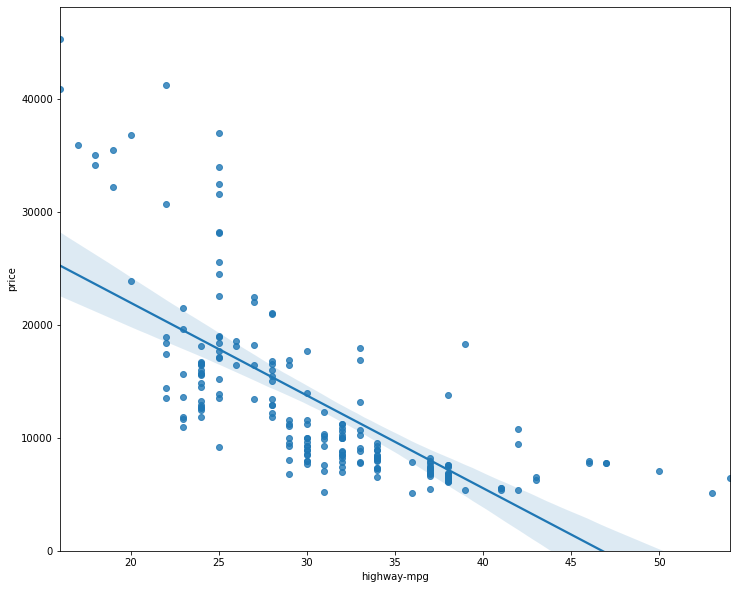

In [29]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

We can see from thiis plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to kee in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for the data.

Let's compare this plot to the regression plot of 'peak-rpm'.

(0.0, 47414.1)

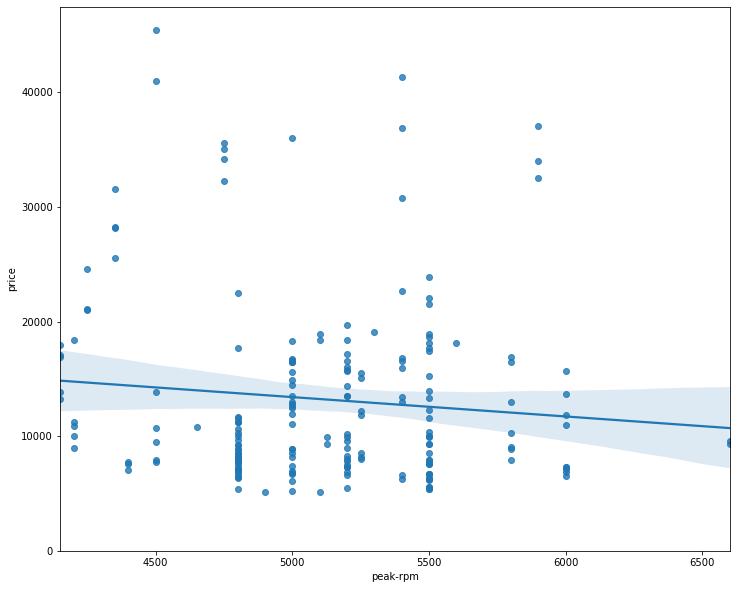

In [30]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

Comparing the regression plot of 'peak-rpm' and 'highway-mpg', we se that the points for 'highway-mpg' are much closer to the generated line and, on average, decrease. The points for 'peak-rpm' have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the 'peak-rpm' increases.

### Residual Plot
A good way to visualize the variance of the data is to use a residual plot.

The difference between the observed value (Y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

We look at the spread of the residuals
- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropiate for the data.

Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

C:\Users\Emilio\anaconda3\envs\strive\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


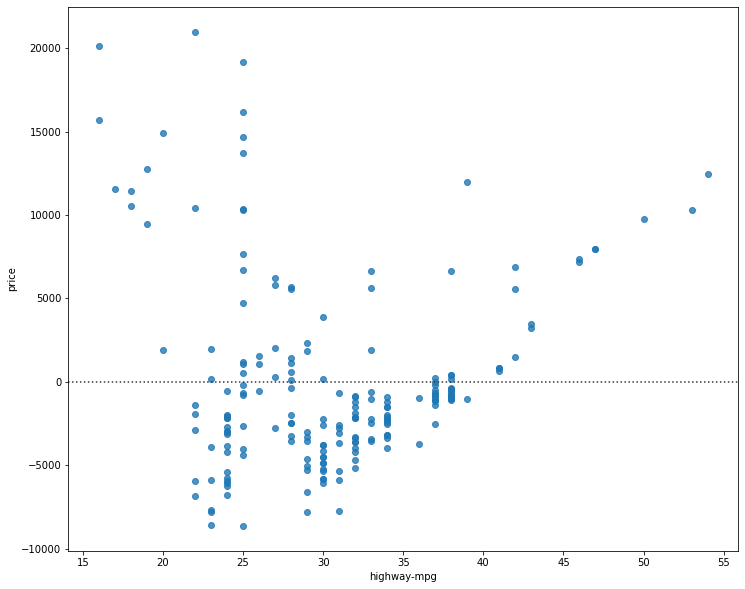

In [31]:
widht = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

We can see from this residual plot that the residuals  are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropiate for this data.

### Multiple Linear Regression

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [32]:
Y_hat = lm.predict(Z)

C:\Users\Emilio\anaconda3\envs\strive\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Emilio\anaconda3\envs\strive\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


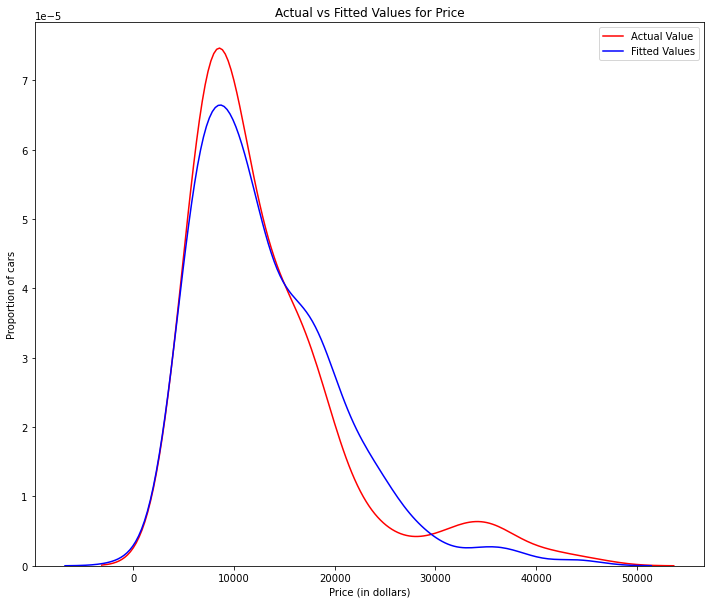

In [35]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Y_hat,hist=False,color='b',label='Fitted Values',ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of cars')

plt.legend()
plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.